In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.datasets import make_gaussian_quantiles

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.metrics import auc, \
    confusion_matrix, plot_confusion_matrix, classification_report, precision_score, roc_curve, \
    precision_recall_curve, recall_score, f1_score, auc, plot_roc_curve, plot_precision_recall_curve, \
    roc_auc_score,average_precision_score, accuracy_score

from sklearn.model_selection import cross_val_score
import sklearn as sk
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# Problem 1.  Regression by Tree Based Methods

In [2]:
X1,y1 = make_regression(n_samples = 1000, n_features=7, n_informative=3, random_state= 66, noise = 10)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.4, random_state = 0)
print("Train feature set shape: %s, Test feature set shape: %s " % (X_train.shape, X_test.shape))
print("Train set labels shape: %s, Test set labels shape: %s " % (y_train.shape, y_test.shape))

Train feature set shape: (600, 7), Test feature set shape: (400, 7) 
Train set labels shape: (600,), Test set labels shape: (400,) 


In [4]:
max_leaf_param_list = np.arange(4, 64,4)
score_results1 = []

for l in max_leaf_param_list:
    dt_reg = DecisionTreeRegressor(max_leaf_nodes = l)
    #dt_reg = dt_reg.fit(X_train, y_train)
    score = cross_val_score(dt_reg, X_train, y_train, cv = 3) 
    score_results1.append(np.mean(score))
        
    print("max_depth val: %s, CV Score Avg: %s " % (l, round(np.mean(score), 6)))

max_depth val: 4, CV Score Avg: 0.546472 
max_depth val: 8, CV Score Avg: 0.671259 
max_depth val: 12, CV Score Avg: 0.725973 
max_depth val: 16, CV Score Avg: 0.743565 
max_depth val: 20, CV Score Avg: 0.754882 
max_depth val: 24, CV Score Avg: 0.778278 
max_depth val: 28, CV Score Avg: 0.786303 
max_depth val: 32, CV Score Avg: 0.797782 
max_depth val: 36, CV Score Avg: 0.80383 
max_depth val: 40, CV Score Avg: 0.80919 
max_depth val: 44, CV Score Avg: 0.811414 
max_depth val: 48, CV Score Avg: 0.817357 
max_depth val: 52, CV Score Avg: 0.821158 
max_depth val: 56, CV Score Avg: 0.821025 
max_depth val: 60, CV Score Avg: 0.822432 


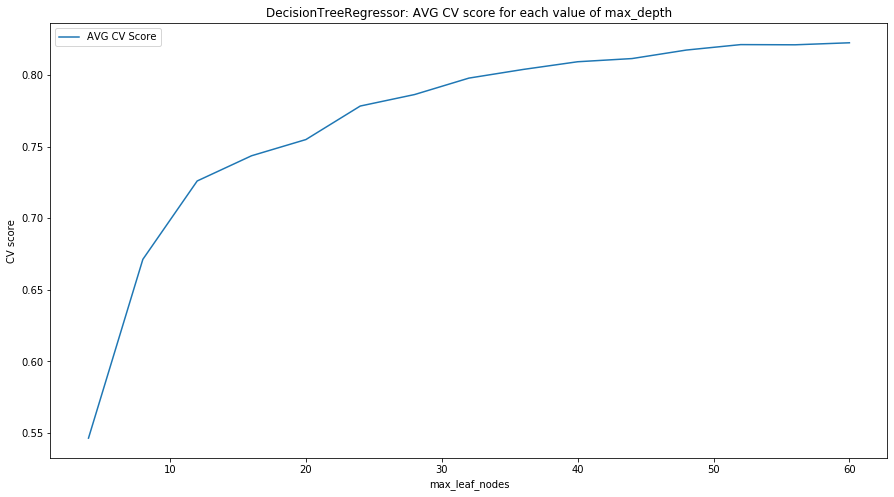

In [5]:
plt.figure(figsize = (15,8)) 
plt.plot(max_leaf_param_list, np.array(score_results1), label = "AVG CV Score")
plt.title("DecisionTreeRegressor: AVG CV score for each value of max_depth")
plt.xlabel("max_leaf_nodes")
plt.ylabel("CV score")

plt.legend()
plt.show()

In [6]:
opt_max_leaf =  max_leaf_param_list[np.argmax(score_results1)]

print("Optimal max_leaf_nodes value using CV: %s" % opt_max_leaf)

Optimal max_leaf_nodes value using CV: 60


In [7]:
Reg_A = DecisionTreeRegressor(max_leaf_nodes = opt_max_leaf, random_state = 66 )
Reg_A = Reg_A.fit(X_train,y_train)

reg_A_train_score = Reg_A.score(X_train,y_train)

In [8]:
reg_A_train_score

0.9549263282655477

In [9]:
param_grid = {'n_estimators' : [200, 400, 800, 1000], 
              "max_features": [2,3,4,5,6]}

mod_rand = RandomForestRegressor(random_state = 66, criterion='mse')

Reg_B = GridSearchCV(mod_rand, param_grid = param_grid, cv = 3, scoring = "r2")
Reg_B = Reg_B.fit(X_train,y_train)

In [44]:
Reg_B.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=66, verbose=0, warm_start=False)

In [45]:
Reg_B.best_params_

{'max_features': 6, 'n_estimators': 400}

In [12]:
reg_B_train_score = Reg_B.best_estimator_.score(X_train, y_train)

In [13]:
reg_B_train_score

0.9917784717010991

In [46]:
param_grid = {'n_estimators' : [200, 300, 500, 700, 1000], 
              'base_estimator__max_depth': [1,2,3]}

mod_ada = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(criterion="mse"), random_state = 66)

Reg_C = GridSearchCV(mod_ada, param_grid = param_grid, cv = 3)
Reg_C = Reg_C.fit(X_train,y_train)

In [47]:
Reg_C.best_params_

{'base_estimator__max_depth': 3, 'n_estimators': 500}

In [48]:
reg_C_train_score = Reg_C.best_estimator_.score(X_train,y_train)

In [49]:
reg_C_train_score

0.9283655526045946

In [18]:
print(reg_A_train_score)
print(reg_B_train_score)
print(reg_C_train_score)

0.9549263282655477
0.9917784717010991
0.9283655526045946


In [19]:
reg_A_test_score = Reg_A.score(X_test,y_test)
reg_B_test_score = Reg_B.best_estimator_.score(X_test, y_test)
reg_C_test_score = Reg_C.best_estimator_.score(X_test, y_test)

In [20]:
print(reg_A_test_score)
print(reg_B_test_score)
print(reg_C_test_score)

0.8441623742296558
0.9428841521604249
0.9069495930080262


# Problem II. Classification by SVC (score = 50)

In [50]:
X2, y2 = make_gaussian_quantiles(n_samples=1000, n_features=12, n_classes = 2, random_state= 66)
print( np.unique(y2, return_counts = True) )

(array([0, 1]), array([500, 500]))


In [51]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 0)
print("Train feature set shape: %s, Test feature set shape: %s " % (X_train2.shape, X_test2.shape))
print("Train set labels shape: %s, Test set labels shape: %s " % (y_train2.shape, y_test2.shape))

Train feature set shape: (700, 12), Test feature set shape: (300, 12) 
Train set labels shape: (700,), Test set labels shape: (300,) 


In [62]:
degree_grid = np.array([1,2,3])
#c_param_grid = [0.01, 0.1, 1]
c_param_grid = np.linspace(0.1, 10, 20)

mod_svm_poly = SVC(kernel = "poly", random_state = 66, probability = True)
opt_mod_svm_poly = GridSearchCV(mod_svm_poly, cv = 3, scoring = "accuracy",
                             param_grid = {'degree': degree_grid, 'C': c_param_grid})
Class_A = opt_mod_svm_poly.fit(X_train2,y_train2)

In [63]:
print("Class_A Estimator %s" % Class_A.best_estimator_)

Class_A Estimator SVC(C=6.873684210526316, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=2, gamma='scale',
    kernel='poly', max_iter=-1, probability=True, random_state=66,
    shrinking=True, tol=0.001, verbose=False)


In [64]:
print("Class_A Best Params %s" % Class_A.best_params_)

Class_A Best Params {'C': 6.873684210526316, 'degree': 2}


In [65]:
print("Class_A accuracy for train data %s" % Class_A.best_estimator_.score(X_train2, y_train2))

Class_A accuracy for train data 0.9757142857142858


In [67]:
y_pred_A = Class_A.predict(X_test2)
pred_prob_A = Class_A.predict_proba(X_test2)

In [95]:
gamma_grid = [0.001, 0.01, 0.1, 1, 10]

mod_svm_radial = SVC(kernel = "rbf", probability = True, random_state = 66)
opt_mod_svm_radial = GridSearchCV(mod_svm_radial, cv = 3, scoring = "accuracy",
                                  param_grid = {'C': c_param_grid,'gamma':gamma_grid})
Class_B = opt_mod_svm_radial.fit(X_train2, y_train2)

In [96]:
print("Class_B best Estimator %s" % Class_B.best_estimator_)

Class_B best Estimator SVC(C=3.2263157894736847, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=66, shrinking=True, tol=0.001,
    verbose=False)


In [97]:
print("Class_B Best Params %s" % Class_B.best_params_)

Class_B Best Params {'C': 3.2263157894736847, 'gamma': 0.1}


In [98]:
print("Class_B accuracy for train data %s" % Class_B.best_estimator_.score(X_train2, y_train2))

Class_B accuracy for train data 1.0


In [99]:
y_pred_B = Class_B.predict(X_test2)
pred_prob_B = Class_B.predict_proba(X_test2)

### Compare models “Class_A” and “Class_B” on the test data by accuracies

In [78]:
print("Class_A accuracy for test data %s" % Class_A.best_estimator_.score(X_test2, y_test2))
print("Class_B accuracy for train data %s" % Class_B.best_estimator_.score(X_test2, y_test2))

Class_A accuracy for test data 0.91
Class_B accuracy for train data 0.9233333333333333


### Compare models “Class_A” and “Class_B” on the test data by ROC curves and the corresponding AUCs

In [81]:
print("ROC AUC FOR CLASS_A \n")
fpr0_A, tpr0_A, thresholds0_A = roc_curve(y_test2, pred_prob_A[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_A, tpr0_A))

fpr1_A, tpr1_A, thresholds1_A = roc_curve(y_test2, pred_prob_A[:,1], pos_label = 1)
print("ROC: AUC Class 1: ", auc(fpr1_A, tpr1_A))

ROC AUC FOR CLASS_A 

ROC: AUC Class 0:  0.979551920341394
ROC: AUC Class 1:  0.979551920341394


In [82]:
print("ROC AUC FOR CLASS_B \n")
fpr0_B, tpr0_B, thresholds0_B = roc_curve(y_test2, pred_prob_B[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_B, tpr0_B))

fpr1_B, tpr1_B, thresholds1_B = roc_curve(y_test2, pred_prob_B[:,1], pos_label = 1)
print("ROC: AUC Class 1: ", auc(fpr1_B, tpr1_B))

ROC AUC FOR CLASS_B 

ROC: AUC Class 0:  0.9806187766714083
ROC: AUC Class 1:  0.9806187766714082


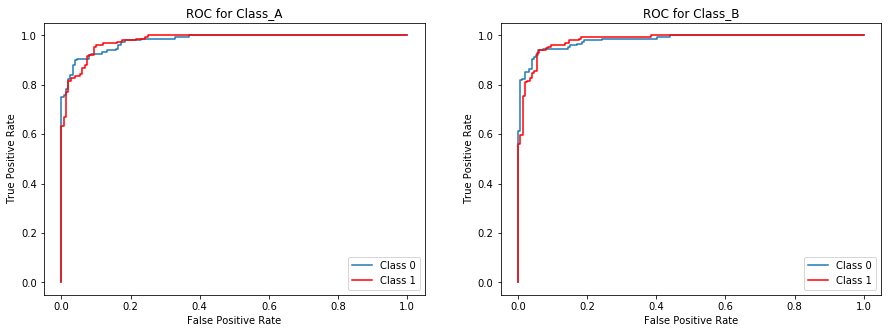

In [83]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(fpr0_A, tpr0_A, "-", label = "Class 0")
plt.plot(fpr1_A, tpr1_A, "-", color = 'r', label = "Class 1")
plt.title("ROC for Class_A")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1,2,2)
plt.plot(fpr0_B, tpr0_B, "-", label = "Class 0")
plt.plot(fpr1_B, tpr1_B, "-", color = 'r', label = "Class 1")
plt.title("ROC for Class_B")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.show()

### Compare models “Class_A” and “Class_B” on the test data by PR curves for each class and the corresponding PR-AUCs

In [84]:
print("PR AUC FOR CLASS_A \n")
p0_A, r0_A, thresholds0_A = precision_recall_curve(y_test2, pred_prob_A[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 0:", auc(r0_A, p0_A))

p1_A, r1_A, thresholds1_A = precision_recall_curve(y_test2, pred_prob_A[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_A, p1_A))

PR AUC FOR CLASS_A 

Precision-Recall: AUC Class 0: 0.980876926332565
Precision-Recall: AUC Class 1: 0.980120388243721


In [85]:
print("PR AUC FOR CLASS_B \n")
p0_B, r0_B, thresholds0_B = precision_recall_curve(y_test2, pred_prob_B[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 0:", auc(r0_B, p0_B))

p1_B, r1_B, thresholds1_B = precision_recall_curve(y_test2, pred_prob_B[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_B, p1_B))


PR AUC FOR CLASS_B 

Precision-Recall: AUC Class 0: 0.9820059189726763
Precision-Recall: AUC Class 1: 0.980587840058248


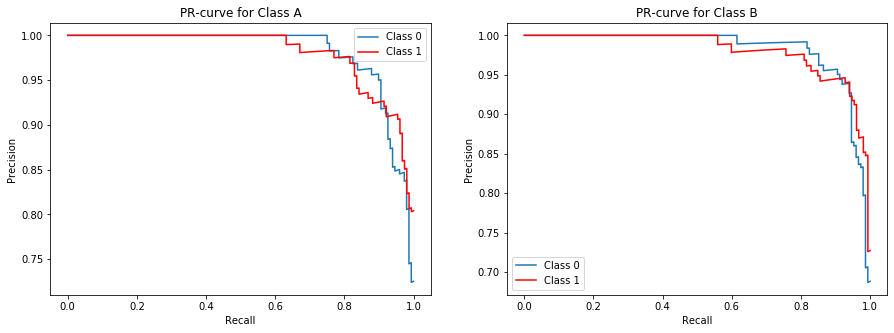

In [86]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(r0_A, p0_A, "-", label = "Class 0")
plt.plot(r1_A, p1_A, "-", color = 'r', label = "Class 1")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-curve for Class A")
plt.legend()

plt.subplot(1,2,2)
plt.plot(r0_B, p0_B, "-", label = "Class 0")
plt.plot(r1_B, p1_B, "-", color = 'r', label = "Class 1")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-curve for Class B")

plt.show()

In [40]:
print("PR AUC FOR CLASS_A \n")

print("Precision-Recall: AUC Class 0:", auc(r0_A, p0_A))
print("Precision-Recall: AUC Class 1:", auc(r1_A, p1_A))

print("\n PR AUC FOR CLASS_B \n")

print("Precision-Recall: AUC Class 0:", auc(r0_B, p0_B))
print("Precision-Recall: AUC Class 1:", auc(r1_B, p1_B))


PR AUC FOR CLASS_A 

Precision-Recall: AUC Class 0: 0.9803645582226277
Precision-Recall: AUC Class 1: 0.9810124465111474

 PR AUC FOR CLASS_B 

Precision-Recall: AUC Class 0: 0.9845432251053864
Precision-Recall: AUC Class 1: 0.9839528286659666


### Which models overfit train data?

In [87]:
print("Class_A accuracy for train data %s" % Class_A.best_estimator_.score(X_train2, y_train2))
print("Class_A accuracy for test data %s \n" % Class_A.best_estimator_.score(X_test2, y_test2))


print("Class_B accuracy for train data %s" % Class_B.best_estimator_.score(X_train2, y_train2))
print("Class_B accuracy for train data %s" % Class_B.best_estimator_.score(X_test2, y_test2))

Class_A accuracy for train data 0.9757142857142858
Class_A accuracy for test data 0.91 

Class_B accuracy for train data 1.0
Class_B accuracy for train data 0.9233333333333333


In [100]:
0.9757142857142858- 0.91 

0.06571428571428573

In [101]:
1.0 - 0.9233333333333333

0.07666666666666666